In [26]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use("bmh")
%config InlineBackend.figure_formats=["png"]
import os


In [2]:
S0 = 100
K = 105
T = 1.0
r = 0.05
sigma = 0.2

In [24]:
def random_walk(S0):
    days = 500
    dt = 1/float(days)
    price = np.zeros(days)
    shock = np.zeros(days)
    price[0] = S0
    for i in range(1, days):
        shock[i] = np.random.normal(r*dt, sigma * np.sqrt(dt))
        price[i] = max(0, price[i-1] + shock[i] * price[i-1])
    return price

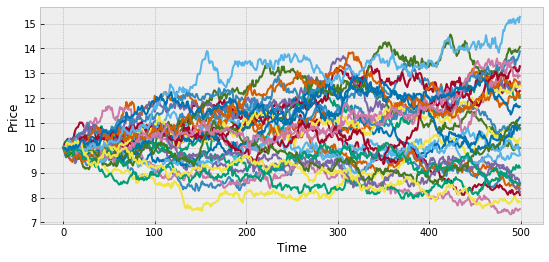

In [27]:
plt.figure(figsize=(9,4))    
for run in range(30):
    plt.plot(random_walk(10.0))
plt.xlabel("Time")
plt.ylabel("Price");

In [35]:
plt.figure(figsize=(9,4))    
for run in range(30):
    plt.plot(arthimetic_brownian(10.0))
plt.xlabel("Time")
plt.ylabel("Price");def arthimetic_brownian(S0):
    days = 500
    z = np.random.standard_normal(days)
    dt = 1/float(days)
    price = np.zeros(days)
    price[0] = S0
    
    for i in range(1, days):
        price[i] = price[i-1] + ((r*dt) + (sigma * np.sqrt(dt) * z[i])) 
    return price

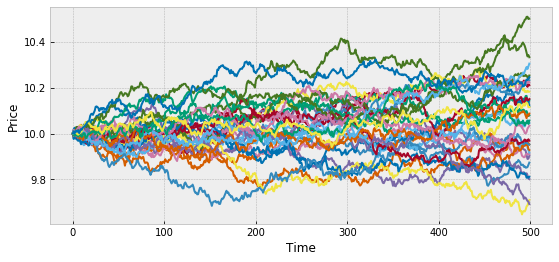

In [36]:
plt.figure(figsize=(9,4))    
for run in range(30):
    plt.plot(arthimetic_brownian(10.0))
plt.xlabel("Time")
plt.ylabel("Price");

In [37]:
def geometric_brownian(S0):
    days = 500
    z = np.random.standard_normal(days)
    dt = 1/float(days)
    price = np.zeros(days)
    price[0] = S0
    
    for i in range(1, days):
        price[i] = price[i-1] +((r*dt*price[i-1]) + (sigma * np.sqrt(dt) * z[i]*price[i-1])) 
    return price

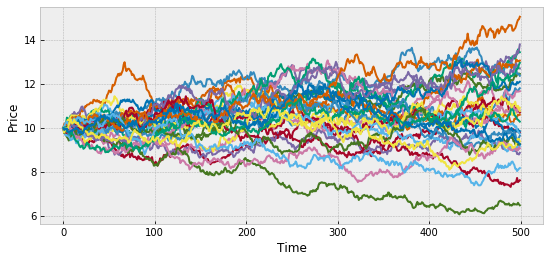

In [43]:
plt.figure(figsize=(9,4))    
for run in range(30):
    plt.plot(geometric_brownian(10.0))
plt.xlabel("Time")
plt.ylabel("Price");

In [41]:
def lognormal_brownian(S0):
    days = 500
    z = np.random.standard_normal(days)
    dt = 1/float(days)
    price = np.zeros(days)
    price[0] = S0
    
    for i in range(1, days):
        price[i] = price[i-1] * np.exp((( r - 0.5 * sigma ** 2)*dt) + (sigma * np.sqrt(dt) * z[i])) 
    return price

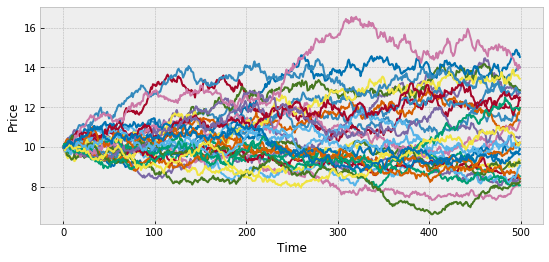

In [42]:
plt.figure(figsize=(9,4))    
for run in range(30):
    plt.plot(lognormal_brownian(10.0))
plt.xlabel("Time")
plt.ylabel("Price");

In [21]:
I = 10000
z = np.random.standard_normal(I)
ST = S0 * np.exp(( r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T)*z)
hT = np.maximum(ST-K, 0)
C0 = np.exp(-r*T) * sum(hT)/I

In [22]:
print(C0)

7.781863126875562
